In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
df=pd.read_csv(r"C:\Users\DMV_12.csv")
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [22]:
df.groupby('shopping_mall').count()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date
shopping_mall,,,,,,,,,
Cevahir AVM,4991,4991,4991,4991,4991,4991,4991,4991,4991
Emaar Square Mall,4811,4811,4811,4811,4811,4811,4811,4811,4811
Forum Istanbul,4947,4947,4947,4947,4947,4947,4947,4947,4947
Istinye Park,9781,9781,9781,9781,9781,9781,9781,9781,9781
Kanyon,19823,19823,19823,19823,19823,19823,19823,19823,19823
Mall of Istanbul,19943,19943,19943,19943,19943,19943,19943,19943,19943
Metrocity,15011,15011,15011,15011,15011,15011,15011,15011,15011
Metropol AVM,10161,10161,10161,10161,10161,10161,10161,10161,10161
Viaport Outlet,4914,4914,4914,4914,4914,4914,4914,4914,4914


In [23]:
df.groupby('category').count()

,invoice_no,customer_id,gender,age,quantity,price,payment_method,invoice_date,shopping_mall
category,,,,,,,,,
Books,4981,4981,4981,4981,4981,4981,4981,4981,4981
Clothing,34487,34487,34487,34487,34487,34487,34487,34487,34487
Cosmetics,15097,15097,15097,15097,15097,15097,15097,15097,15097
Food & Beverage,14776,14776,14776,14776,14776,14776,14776,14776,14776
Shoes,10034,10034,10034,10034,10034,10034,10034,10034,10034
Souvenir,4999,4999,4999,4999,4999,4999,4999,4999,4999
Technology,4996,4996,4996,4996,4996,4996,4996,4996,4996
Toys,10087,10087,10087,10087,10087,10087,10087,10087,10087


In [24]:
total_sales_by_category = df.groupby("category").sum()
total_sales_by_category

,age,quantity,price
category,,,
Books,216882,14982,2.269773e+05
Clothing,1497054,103558,3.107568e+07
Cosmetics,657937,45465,1.848607e+06
Food & Beverage,640605,44277,2.315687e+05
Shoes,436027,30217,1.813534e+07
Souvenir,216922,14871,1.744368e+05
Technology,216669,15021,1.577205e+07
Toys,437032,30321,1.086705e+06


In [32]:
# to get total sales for each combination of branch and product_category
top_5_performing_branches = df.groupby(["shopping_mall", "category"]).sum()[:1]
top_5_performing_branches

age  quantity       price
shopping_mall category                                    
Cevahir AVM   Books            11464       792    11998.80
              Clothing         74729      5180  1554414.40
              Cosmetics        31142      2174    88394.84
              Food & Beverage  33269      2293    11992.39
              Shoes            21211      1473   884050.41

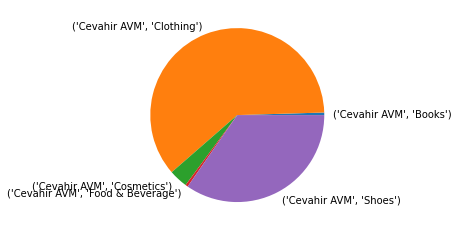

In [40]:
# pie chart for sales by branch
plt.pie(top_5_performing_branches["price"],labels = top_5_performing_branches.index)
plt.show()

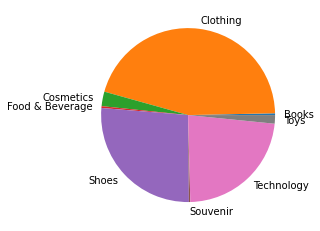

In [36]:
# pie chart for sales by product category
plt.pie(total_sales_by_category["price"], labels = total_sales_by_category.index)
plt.show()

In [37]:
combined_pivot = df.pivot_table(index="shopping_mall", columns="category", values="price", aggfunc="sum")

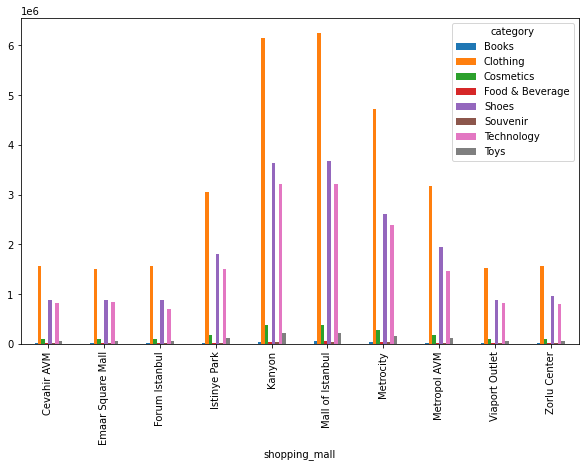

In [38]:
# grouped bar chart for sales of different categories at different branches
combined_pivot.plot(kind="bar", figsize=(10, 6))
plt.show()